# Khibar Rassul - CW - Python

## Basic Project Concept

The basic idea behind the project is to examine if there is any correlation between the words used by a world leader and the potential impact it has on public opinion during the COVID epidemic. In other words, I am examining the social responsibility aspect of how world leaders communicate during a crisis and how that shapes public opinion. I have selected two countries, New Zealand and the USA, and two leaders, PM Jacinda Ardern and President Donald Trump, for the comparison. 

## Approach

I have divided this process into two stages; the first stage conducts a public opinion analysis, and the second stage performs an analysis of different public speeches given by the leaders. 

### Public Opinion Analysis:
Here I am going first to filter the data, so I only have data for New Zealand and the USA. I am then going to convert string survey responses into a standardized integer value, so we can make various numeric comparisons. I will then generate multicolumn bar-charts so we can compare and analyze the survey outcome between the two selected countries.

Please note, that only the filtered data file is included in the submission, as the overall survey was over 120MB large.

### Speech Analysis:
I will scrape 4 speeches from each world leader from around the same period, and the same website, for synchronicity. The four scrapped transcripts are combined into two .txt files, one for each leader and included in this submission. I am then going to build my own functions to clean, tokenize, and structure the data, as well as remove stop-words base on a frequency percentage parameter. 

I am then going to generate word-clouds for the 30 most common words used by each leader, the 20 most common words used by each leader but not at all by the other, and finally, a sentiment analysis through a scatter plot. For the sentiment analysis, I am using TextBlob

## Key Finding

From section 1, we can observe that people in both countries have similar attitudes towards canceling social events, closing non-essential stores, and implementing a curfew. We can also observe that there is a correlation between the lack of trust in government and the individual perspective of the attitudes of the community at large towards canceling social events, closing non-essential stores, and implementing a curfew.

Lower trust in government seems to also indicate lower expectations of the community at large as compared to the individual expectations of him/her self. 

From the transcript analysis, we can see that President Trump is more focused on talking about himself and his government and is more driving a vision of winning over the virus. That inward focus and focus on beating the virus, might not connect with people, who are experiencing the epidemic in their daily lives. Incidentally, Americans have a comparatively much lower expectation of their government, the government's ability to handle the epidemic or trust the government, to tell the truth about the epidemic.

PM Jacinda on the other hand is more collectively outward focused in her communication and is more negative and factually driven than President Trump. This might help her better connect with the experiences of New Zealanders, who incidentally also have a higher trust in government and attitudes towards the collective. 

It therefore seems to be a certain level of social responsability in how leaders communicate and how that shapes, not only the individual perspective but also the individuals perspective of the community at large.

## Weakness/Uncertainty & Further work

This small project has many potential weaknesses and caveats, as the overall scope of the query has the potential to be exponentially expansive. For example, public opinion is not only shaped by the words of their heads of state. Party politics, ideology, local/global events, individuals, the economy, are examples of other factors that shape public opinion. The selection of speeches can also impact the analysis.

If I were going to take this study further, I would initially focus on expanding the survey to include other countries and look for correlations between a lack of trust in government and lower expectations of the community at large as compared to the individual expectation. If those trends can be further observed, I would then examine the kind of rhetoric used by leaders in those countries and look for comparison with the two leaders we have analyzed in this study.

## Data Sources:

Survey Data: Fetzer, T., Witte, M., Hensel, L., Jachimowicz, J.M., Haushofer, J., Ivchenko, A., Caria, C., Reutskaja, E., Roth, C., Fiorin, F., Gomez, M., Kraft-Todd, G., Goetz, F., & Yoeli, E.. Global Behaviors and Perceptions in the COVID-19 Pandemic. https://doi.org/10.31234/osf.io/3kfmh

Transcript Data: Please the the URL's in the code used for the data scrapping.


In [39]:
# package imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json, requests, re
from bs4 import BeautifulSoup
from functools import reduce
from wordcloud import WordCloud, STOPWORDS 
from textblob import TextBlob

### Section 1.1 - Survey Data Filtering 

In the code snipped below, I show how I imported the overall survey file, a dta file into a panda data frame. I then filtered the two countries targeted for this assignment and the specific relevent columns. I then save the filtered data into a seperate file, and submit that with this assignment.

In [40]:
# Import file, filter by country, select desiered columts, reset indexes amd save as csv
    
    # df = pd.read_stata('GlobalBehaviorsPerceptions_Data_May21_2020.dta')
    # df = df.loc[(df["CountryofLiving"] == "New Zealand") | (df['CountryofLiving'] == "United States")]
    # df = df[['CountryofLiving','fob_social', 'fob_stores', 'fob_curfew', 'sob_social', 'sob_stores', 'sob_curfew', "perceivedreaction", 'govtrust',             'govfact', 'react_pub_appr', 'perceivedeffectivnes']]
    # df = df.reset_index(drop=True)
    # df.to_csv('us_nz_data.csv')


### Section 1.2 - Converting String Response Data to Integer Value

I am importing both the file with the filtered survey data and a JSON file with standardization for the integer value associated with each string response. I am then converting all of the string responses into associated integer values. I then did a type check and discovered that the data type was not entirely correct and thus changed the data type as well. 

In [41]:
# Import the filtered data file to use for this assignment
df = pd.read_csv('us_nz_data.csv')

# Import and read json file for string to value conversion
with open('response_scoring.json') as json_file:
    string_to_value_data = json.load(json_file)

def convertStringToValue(field, params):
    ''' Go through all of the options responses and 
    replace them with the given value within the specified field '''
    
    for item in params:
        df.loc[df[field] == item["string"], field] = item["value"]

# Run through the sequance and convert strings to value
for item in string_to_value_data['conversion_sequence']:
    field = item['col']
    params = string_to_value_data[item['params']]
    convertStringToValue(field, params)

# Check Data Types & Null Counts
df.info()

# Convert Into Integers
df[['fob_social', "fob_stores",'fob_curfew', 'perceivedreaction', 'govtrust',	'govfact', 'react_pub_appr', 'perceivedeffectivnes']] = df[['fob_social', "fob_stores",'fob_curfew', 'perceivedreaction', 'govtrust',	'govfact', 'react_pub_appr', 'perceivedeffectivnes']].astype("int")

# Double Check Result
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11819 entries, 0 to 11818
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   CountryofLiving       11819 non-null  object
 1   fob_social            11819 non-null  object
 2   fob_stores            11819 non-null  object
 3   fob_curfew            11819 non-null  object
 4   sob_social            11819 non-null  int64 
 5   sob_stores            11819 non-null  int64 
 6   sob_curfew            11819 non-null  int64 
 7   perceivedreaction     11819 non-null  object
 8   govtrust              11819 non-null  object
 9   govfact               11819 non-null  object
 10  react_pub_appr        11819 non-null  object
 11  perceivedeffectivnes  11819 non-null  object
dtypes: int64(3), object(9)
memory usage: 1.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11819 entries, 0 to 11818
Data columns (total 12 columns):
 #   Column                Non-N

### Section 1.3 Plotting The Data

Here I visually plot the data to look for initial insights. I group the data by countries and calculate the mean, and build a function for generating multicolumn bar charts for visualization.

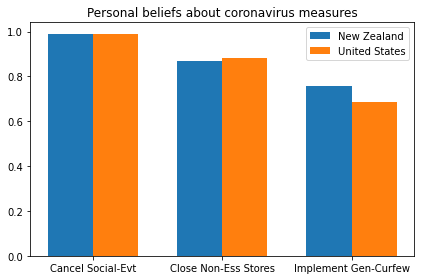

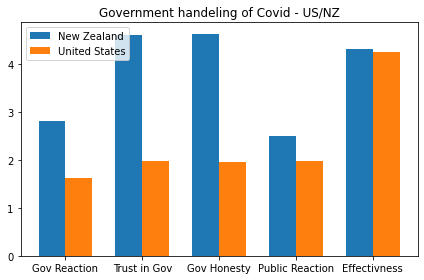

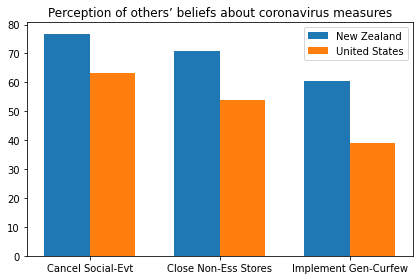

In [42]:
# Devide the Data Based On Country
df_plot = df.groupby(['CountryofLiving']).mean()

# Set Labels For Graphs
labels_gov_handeling = ['Gov Reaction', 'Trust in Gov', 'Gov Honesty', 'Public Reaction', 'Effectivness']
labels_beh = ['Cancel Social-Evt', 'Close Non-Ess Stores', 'Implement Gen-Curfew']


def createMultiColumnChart(title, labels, data_1, data_2):
    ''' Generate a multicolumn barchart '''
    x = np.arange(len(labels))
    location = np.arange(len(labels))
    width = 0.35 
    fig, ax = plt.subplots()

    ax.bar(x - width/2, data_1, width, label="New Zealand")
    ax.bar(x + width/2, data_2, width, label="United States" )

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    fig.tight_layout()
    plt.show()

# Generate Three graphs
createMultiColumnChart('Personal beliefs about coronavirus measures', labels_beh, df_plot.iloc[0, 0:3], df_plot.iloc[1, 0:3])
createMultiColumnChart('Government handeling of Covid - US/NZ', labels_gov_handeling, df_plot.iloc[0, 6:11], df_plot.iloc[1, 6:11])
createMultiColumnChart('Perception of others’ beliefs about coronavirus measures', labels_beh, df_plot.iloc[0, 3:6], df_plot.iloc[1, 3:6])


### Section 1.4 Analyzing Initial Insight

The initial data analysis show a few potential interesting insights.

1. On an individual level, there seems to be no significant difference between New Zealanders and Americans, whether or not social events should be canceled, non-essential stores should be closed, and a general curfew implemented.

2. In terms of the government's handling of the coronavirus crisis, there seems to be a trend where Americans think that the government response is less sufficient. Americans have much lower trust in their government's ability to address the crisis than their New Zealander counterparts. American also have a much lower opinion about the honesty of the government about the crisis as compared to their New Zealander counterparts.

3. When it comes to individual perspectives about what others think, there is also a divide between the American and New Zealander views. There is a more significant gap between that American think about coronavirus measures on a personal level and what they think that other members in their community think about the same measures.  This could indicate a potentially more significant internal division among Americans than New Zealanders. 

One possible conclusion we could potentially draw from this is that the lack of trust in the government response to the corona crisis affects the individuals' perspective of how their community responds to the crisis at large.  This creates a potential internal division along political lines.



### Section 2.1 - Data Scrapping

Here, I am scraping data form the rev website. I am using regex expressions to target only the part of the transcripts where out targeted world leaders were speaking. I then combine the gathered data from each leader and export them into two different .txt file, to be included with the submission of this assignment. 

In [43]:
text_res = []

urls_ja_rev = [
'https://www.rev.com/blog/transcripts/new-zealand-covid-19-briefing-transcript-may-4',
'https://www.rev.com/blog/transcripts/new-zealand-covid-19-briefing-transcript-april-29', 'https://www.rev.com/blog/transcripts/new-zealand-covid-19-briefing-transcript-april-7', 'https://www.rev.com/blog/transcripts/new-zealand-covid-19-briefing-transcript-april-6'
]

urls_dt_rev = [
'https://www.rev.com/blog/transcripts/donald-trump-press-conference-on-coronavirus-testing-may-11', 'https://www.rev.com/blog/transcripts/donald-trump-coronavirus-press-conference-transcript-may-22-places-of-worship-must-open', 'https://www.rev.com/blog/transcripts/donald-trump-speech-transcript-on-vaccine-development-for-coronavirus', 'https://www.rev.com/blog/transcripts/donald-trump-david-muir-interview-transcript-covid-19'
]

# Filter for targeted speaker
def filterTranscriptsRevSite(url, target):
    ''' Get url for fetching a page, and a reg-ex target for matching the the specific section of the transcript we want to keep '''
    req_res_pg = requests.get(url).text
    soup = BeautifulSoup(req_res_pg, 'html.parser')
    text_blob = soup.find(class_ = 'fl-callout-text')
    paragraph_list = text_blob.find_all('p')
    
    for p in paragraph_list:
        if re.search(target, p.text) is not None:  
            print(p)
            text_res.append(p.text)    

    
# Get Jacinda Transcripts
def getSaveJacindaTranscripts(urls):
    ''' Get transcripts & save them in a txt file for assignment submission '''
    for url in urls:
        filterTranscriptsRevSite(url, r'Jacinda Ardern:')

    f = open("jacinda_raw_transcript.txt", "x")
    f.write(''.join(text_res))
    f.close()

# Get Trump Transcripts
def getSaveTrumpTranscripts(urls):
    ''' Get transcripts & save them in a txt file for assignment submission '''
    for url in urls:
        filterTranscriptsRevSite(url, r'Donald Trump:')

    f = open("trump_raw_transcript.txt", "x")
    f.write(''.join(text_res))
    f.close()

# This function has already been called and output submited in the form of .txt file, 
# which we will import and work with a bit further down

# getSaveJacindaTranscripts(urls_ja_rev)
# getSaveTrumpTranscripts(urls_dt_rev)


### Section 2.2 - Clean, Count, Convert & Remove Stop Words

Here, I am importing the .txt files I save earlier and store them in a local variable.  I then clean the data by removing announcer snippets in the text, remove various characters and symbols, convert to lower case, tokenize and remove remaining single letter words.

I then count the frequency of each word used by each leader and associate it with them. I take that data and put it into a panda data frame and convert all NaN to 0.

I then remove stop words, by filtering words based on frequency variable of 0.001, which I arrived at, through a bit of trial and error. 

In [53]:
# Open Transcript Files
transcript_file_jacinda = open('./jacinda_raw_transcript.txt', 'rt')
transcript_file_trump = open('./trump_raw_transcript.txt', 'rt')

# Add them to local variables
jacinda_transcript_raw = transcript_file_jacinda.read()
trump_transcript_raw = transcript_file_trump.read()

# Close files
transcript_file_jacinda.close()
transcript_file_trump.close()

def cleanTokenizeTextHandler(text):
    ''' Initial Round of Cleaning and Tonizing of Text ''' 
    # Clean Text
    text = text.lower()
    text = re.sub(r'donald trump:', " ", text)
    text = re.sub(r'prime minister jacinda ardern:', " ", text)
    text = re.sub(r'jacinda ardern:', " ", text)
    text = re.sub(r'john', " ", text)
    text = re.sub(r'bloomfield', " ", text)
    text = re.sub('[‘’“”…]', " ", text)
    text = re.sub(r"[,\d\n\\(\)\-\'?\.\[\]\:]", " ", text)

    # Tokinize
    text = text.split()
  
    # Remove Single Letters
    remove_single_letter = lambda x: len(x) != 1
    text = list(filter(remove_single_letter, text))
    
    return text


def countWordsHandler(acc, currentItem):
    ''' Reduce function for counting all the instances of a word'''

    if currentItem in acc:
        acc[currentItem] += 1
        return acc

    acc[currentItem] = 1
    return acc


def cleanCountConvert(speakers, transcripts):
    ''' clean, count and strcture the data as a dict for each speaker 
        and associated transcripts '''

    data = {}

    for i, speaker in enumerate(speakers):
        clean_bow = cleanTokenizeTextHandler(transcripts[i])
        counted_bow = reduce(countWordsHandler, clean_bow, {})
        data[speaker] = counted_bow

    return data


# Run the ccc function
transcript_data = cleanCountConvert(["jacinda", "trump"], [jacinda_transcript_raw, trump_transcript_raw])

# Transcript Data Frame
dft = pd.DataFrame(data=transcript_data)
# Convert NaN to 0
dft = dft.fillna(0)


# Remove Stop Words Function
def removeStopWords(words):
    ''' Remove stop words, stop words defined by percentage limit '''
    # Limit for Stop Word Filter
    sw_limit = 0.001

    # Total Number of Words for Each Speaker
    bow_jacinda, bow_trump = words.sum()

    # Only keep words smaller than the set limit 
    words = words.loc[(words['jacinda'] < bow_jacinda * sw_limit) & (words['trump'] < bow_trump * sw_limit)]
    return words

sw_dft = removeStopWords(dft)
sw_dft.head(5)



,jacinda,trump
doctor,1.0,1.0
reiterate,1.0,0.0
thanks,4.0,1.0
midwives,1.0,0.0
communities,2.0,4.0


### Section 2.3 - Visualizing Most Common Words

In this section, I am generating word-clouds based on the 30 most common words used by each leader. One word-cloud for each leader.

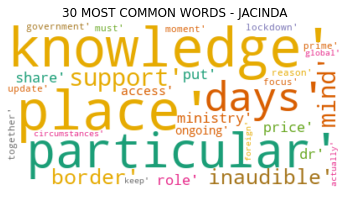

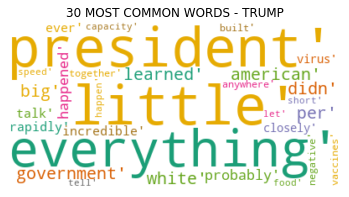

In [45]:
# Generate Wordcloud function
def showWordcloud(data, title):
    '''Create word cloud function '''

    wordcloud = WordCloud(
        background_color="white", 
        colormap="Dark2",
        max_font_size=150, 
        random_state=42
    ).generate(str(data))
    
    plt.axis("off")
    plt.title(title.upper())
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.show()

# Generate word clouds per speaker and word count param
def mostCommonWords(params):
    '''Select top words per speaker and generat word cloud '''
    for speaker in sw_dft.columns:
        data = list(sw_dft.sort_values([speaker], ascending=False).head(params).index)
        title = str(params) + " Most Common Words - " + speaker
        showWordcloud(data, title)

# Generate wordclouds for the 30 and 60 most common words
mostCommonWords(30)



### Section 2.4 - Deviating Common Words Used

Here I am filtering the data to target the top 20 words used by one leader and not at all by the other leader, to get a better insight into the kind of vocabulary used by the leaders. The result is visualized through word-clouds. 

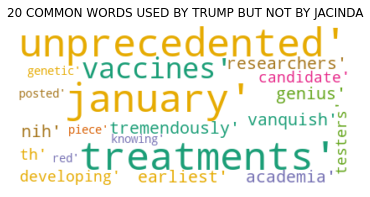

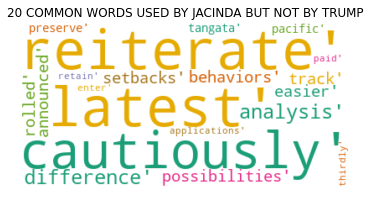

In [50]:
# Generate wordclouds based on words not use by other speaker
def diviatingWordUse(params, speaker_one, speaker_two):
    ''' Generate worclouds for the most common words not used by the other speaker'''
    diviating_words = sw_dft.loc[sw_dft[speaker_one] == 0]

    data = list(diviating_words.sort_values([speaker_one], ascending=False).head(params).index)
    title = str(params) + " Common Words Used By " + speaker_two + " But Not By " + speaker_one
    showWordcloud(data, title)  

# get speaker
speaker_jacinda, speaker_trump = sw_dft.columns

# Call the functions
diviatingWordUse(20, speaker_jacinda, speaker_trump)
diviatingWordUse(20, speaker_trump, speaker_jacinda)


### Section 2.5 - Sentiment Analysis

In this section, I use the TextBlob module to conduct sentiment analysis between the raw transcripts of each leader and visualize the result through a scatter plot. 

TextBlom returns two scores, one for polarity and one for subjectivity.

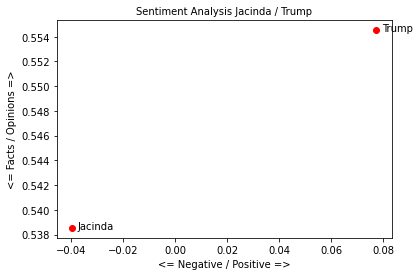

In [55]:
# Generate sentiment analysis
def sentimentScatterPlot(transcripts, speakers):
    '''Generate sentiment analysis and produce scatter plot '''
    for i, transcript in enumerate(transcripts):
        x, y = TextBlob(transcript).sentiment
        plt.scatter(round(x, 5), round(y, 5), color='red')
        plt.text(x+.002, y-.0001, speakers[i], fontsize=10)
    
    plt.title('Sentiment Analysis Jacinda / Trump', fontsize=10)
    plt.xlabel('<= Negative / Positive =>', fontsize=10)
    plt.ylabel('<= Facts / Opinions =>', fontsize=10)
    plt.show()

# call function
sentimentScatterPlot([jacinda_transcript_raw, trump_transcript_raw], ['Jacinda', 'Trump'])

### Section 2.6 - Section 2 Analysis

#### First Word-cloud
From the first word-cloud, an initial observation can be made: President Trump speaks more about himself, the words president, government white (referring to the white house), are all relating back to him.  Then there are words like negative, didn', anywhere, which could indicate an attempt to push responsibility away.

Jacinda, on the other hand, uses words like knowledge, access, support, share, and circumstances, which probably would be better for driving a collective consciousness.  She uses words like price, lockdown, days, and role, which might be a method for better connecting with people struggling with prices, days (as a timeframe), lockdown, and so forth, again something that might be better at driving that collective consciousness. 

#### Second Word-cloud
In the second word-cloud, an initial observation can be made, where President Trump uses terms that are more positive than does PM Jacinda.  Trump seems to be driving home a vision of resolution, by using words like genius, vaccine, tremendously, vanquish, researchers, earliest, and unprecedented. 

Jacinda, on the other hand, is very cautious by using words like cautiously, reiterate, setback, difference, and preserve. 

#### Sentiment Analysis - Scatter Plot

From the scatter plot, we can observe President Trump is more positive and opinionated than Jacinda, who is more negative and factual. This does to some extent go hand in hand with the word-cloud analysis above.